# **Time Series Prediction**

**Name:**  Maryam Karimi Jafari

**Student ID:**  99106617

# P0: Intro

In this notebook, we will explore the application of Long Short-Term Memory (LSTM) networks for time series prediction, specifically focusing on the Delhi Climate Change dataset. LSTM networks, a type of Recurrent Neural Network (RNN), are particularly adept at learning from sequences of data, making them an excellent choice for tasks involving time series prediction. The Delhi Climate Change dataset provides a rich source of historical climate data, offering a unique opportunity to apply LSTM models to predict future climate trends. Through this project, we aim to demonstrate how LSTMs can be effectively utilized to analyze and forecast time series data, thereby contributing to our understanding of climate change and its potential impacts.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# P1: Data Exploration (30 points)




Load the train and test datasets as a dataframe. Then, check for any null values and remove the rows containing them. Finally, display the first 10 rows. Also check for duplicate rows and delete them, if there are any. (6 points)

In [2]:
#Dataset: https://drive.google.com/drive/folders/10WlHBZ1H1NZjwybLXmOorbEFxl6-UIMd?usp=sharing
# mounting google drive for loading the dataset in the following
drive.mount('/content/drive')
# datasets' path
train_datapath='/content/drive/MyDrive/Q1_Data/DailyDelhiClimateTrain.csv'
test_datapath='/content/drive/MyDrive/Q1_Data/DailyDelhiClimateTest.csv'
# extracting dataset from csv files
trainDataset = pd.read_csv(train_datapath)
testDataset = pd.read_csv(test_datapath)
# printing the indexes for figuring out the concept and structure of data
print(trainDataset.columns)
print(testDataset.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')
Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


In [3]:
print(trainDataset.index)
print(testDataset.index)

RangeIndex(start=0, stop=1462, step=1)
RangeIndex(start=0, stop=114, step=1)


In [4]:
print(trainDataset.head)
print(testDataset.head)

<bound method NDFrame.head of             date   meantemp    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]>
<bound method NDFrame.head of            date   meantemp   humidity  wind_speed  meanpressure
0    2017-01-01  15.913043  85.869565    2.743478     59.0

In [5]:
# removing rows containing NaN values
trainDataset.dropna(inplace=True)
testDataset.dropna(inplace=True)
# removing rows that are repeated
trainDataset.drop_duplicates(inplace=True)
testDataset.drop_duplicates(inplace=True)
# printing the first 10 rows from both training and testing dataset
print('training first 10 rows: ')
print(trainDataset.iloc[0:10,:])
print('testing first 10 rows: ')
print(testDataset.iloc[0:10,:])

training first 10 rows: 
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
5  2013-01-06   7.000000  82.800000    1.480000   1018.000000
6  2013-01-07   7.000000  78.600000    6.300000   1020.000000
7  2013-01-08   8.857143  63.714286    7.142857   1018.714286
8  2013-01-09  14.000000  51.250000   12.500000   1017.000000
9  2013-01-10  11.000000  62.000000    7.400000   1015.666667
testing first 10 rows: 
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700

Get a brief description of the dataset (6 points)

In [6]:
# printing the information of training dataframe
trainDataset.info()
print()
print()
# Shows summary statistics for numerical columns
print('here is a summary statistics:')
print(trainDataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


here is a summary statistics:
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    4

In [7]:
# printing the information of testing dataframe
testDataset.info()
print()
print()
# Shows summary statistics for numerical columns
print('here is a summary statistics:')
print(testDataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


here is a summary statistics:
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524


Plot box-plot for each of the columns of train dataset (6 points)

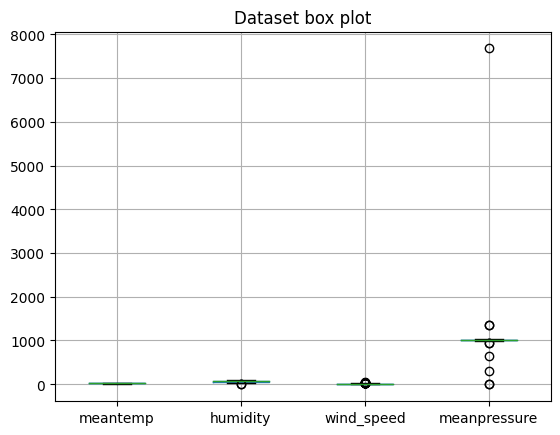

In [8]:
trainDataset.boxplot()
plt.title("Dataset box plot")
plt.show()

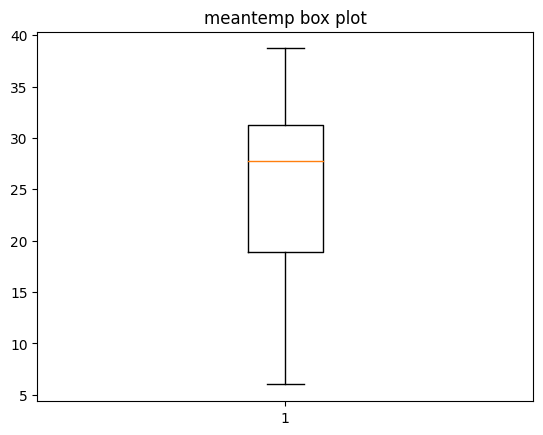

In [9]:
# Creating plot
plt.boxplot(trainDataset['meantemp'])
# Adding title
plt.title("meantemp box plot")
# show plot
plt.show()

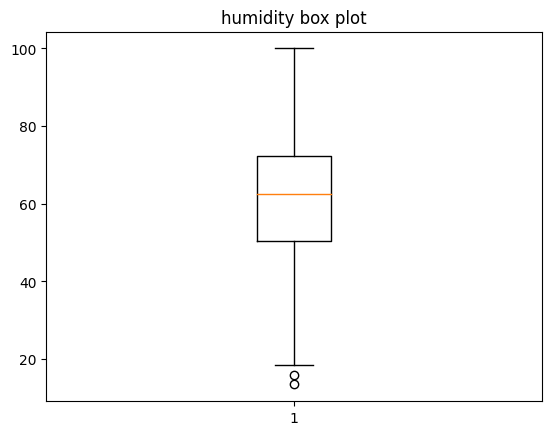

In [10]:
# Creating plot
plt.boxplot(trainDataset['humidity'])
# Adding title
plt.title("humidity box plot")
# show plot
plt.show()

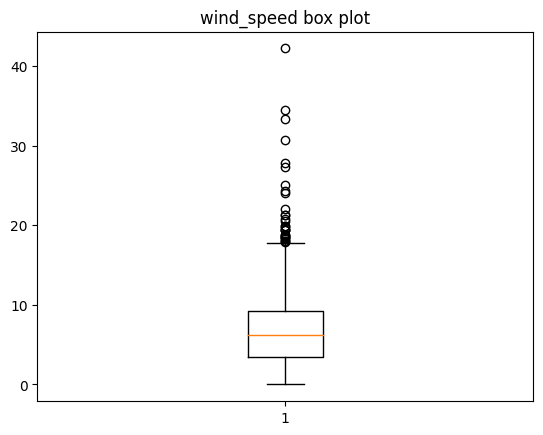

In [11]:
# Creating plot
plt.boxplot(trainDataset['wind_speed'])
# Adding title
plt.title("wind_speed box plot")
# show plot
plt.show()

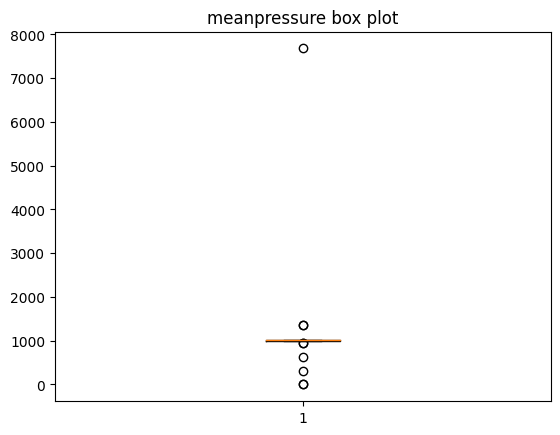

In [12]:
# Creating plot
plt.boxplot(trainDataset['meanpressure'])
# Adding title
plt.title("meanpressure box plot")
# show plot
plt.show()

Visualize 'Mean Temp', 'Humidity', 'Wind Speed', and 'Mean Pressure' over time from the train DataFrame (6 points)

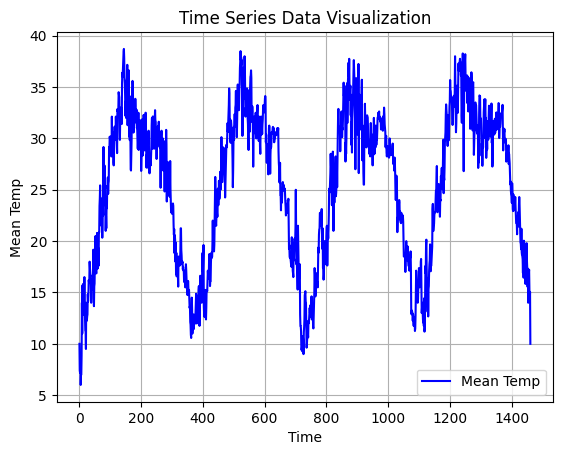

In [13]:
# Plot the time series data
plt.plot(trainDataset.index, trainDataset['meantemp'], color='blue', label='Mean Temp')
plt.title('Time Series Data Visualization')
plt.xlabel('Time')
plt.ylabel('Mean Temp')
plt.legend()
plt.grid(True)
plt.show()

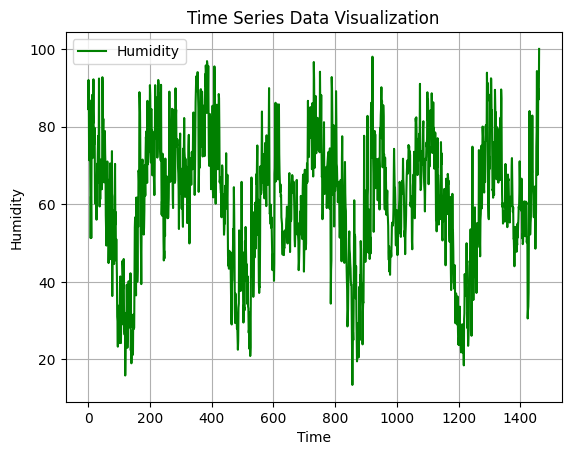

In [14]:
# Plot the time series data
plt.plot(trainDataset.index, trainDataset['humidity'], color='green', label='Humidity')
plt.title('Time Series Data Visualization')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

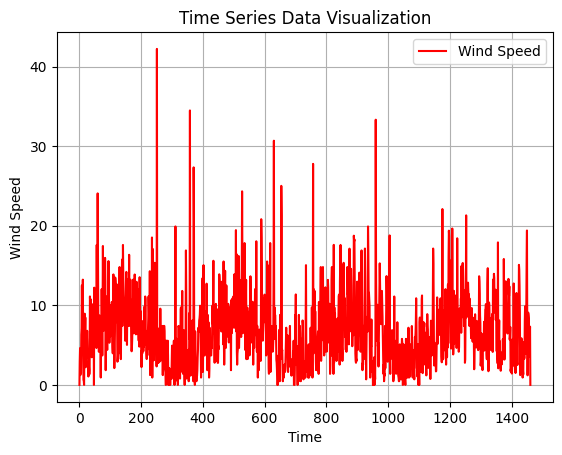

In [15]:
# Plot the time series data
plt.plot(trainDataset.index, trainDataset['wind_speed'], color='red', label='Wind Speed')
plt.title('Time Series Data Visualization')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.grid(True)
plt.show()

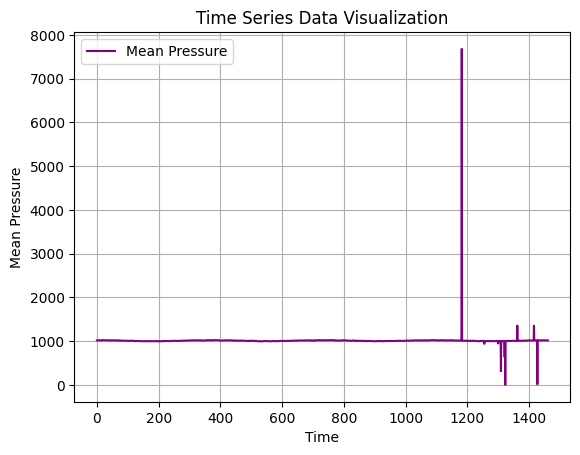

In [16]:
# Plot the time series data
plt.plot(trainDataset.index, trainDataset['meanpressure'], color='purple', label='Mean Pressure')
plt.title('Time Series Data Visualization')
plt.xlabel('Time')
plt.ylabel('Mean Pressure')
plt.legend()
plt.grid(True)
plt.show()

Plot a scatter plot of dataset 'Mean Temp', 'Humidity', 'Wind Speed', and 'Mean Pressure' against 'Date' from the `train` DataFrame to visualize the distribution of daily temperatures. (6 points)


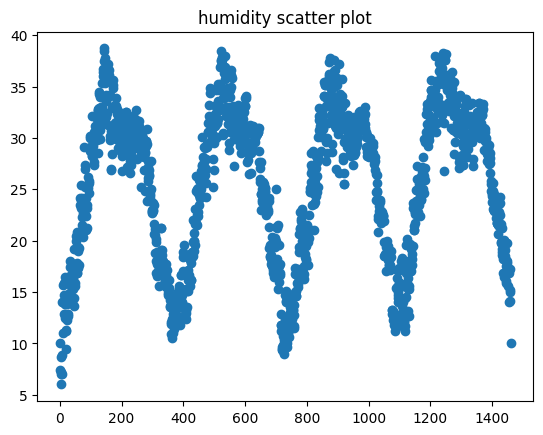

In [17]:
plt.scatter(trainDataset.index, trainDataset['meantemp'])
plt.title("humidity scatter plot")
plt.show()

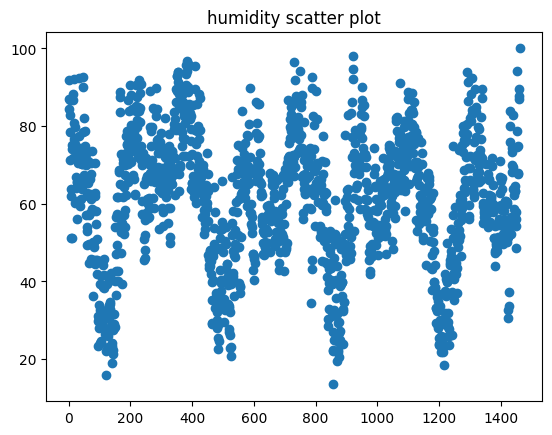

In [18]:
plt.scatter(trainDataset.index, trainDataset['humidity'])
plt.title("humidity scatter plot")
plt.show()

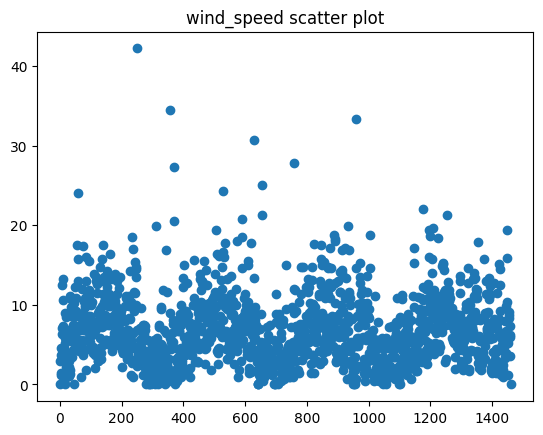

In [19]:
plt.scatter(trainDataset.index, trainDataset['wind_speed'])
plt.title("wind_speed scatter plot")
plt.show()

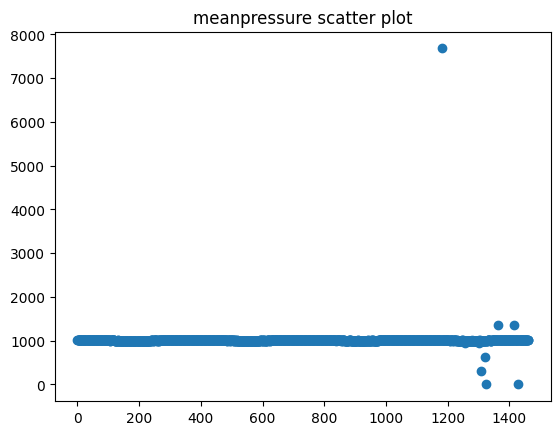

In [20]:
plt.scatter(trainDataset.index, trainDataset['meanpressure'])
plt.title("meanpressure scatter plot")
plt.show()

In [21]:
y_train = trainDataset['date']
y_test = testDataset['date']

#P2: Predicting Mean Temperature of Delhi (30 points)

Extract the `meantemp` column from both the training and test datasets for further analysis or modeling. (1 point)

In [35]:
x_train_meantemp = trainDataset['meantemp'].to_numpy()
x_test_meantemp = testDataset['meantemp'].to_numpy()

Normalize the values between 0 to 1 (1 point)

In [36]:
x_train_meantemp_norm = x_train_meantemp / np.max(np.absolute(x_train_meantemp))
x_test_meantemp_norm = x_test_meantemp/ np.max(np.absolute(x_test_meantemp))

Define a function `create_dataset` to prepare time series data for LSTM. (3 points)

The function takes two arguments: the dataset, which is a array you want to convert into a dataset, and the look_back, which is the number of previous time steps to use as input variables to predict the next time period - in this case, defaulted to 1.

This function will create two datasets. One of them is the mean temprature at a given time (t), and the other one is the mean temprature at the next time (t + 1).



In [37]:
def create_dataset(dataset, look_back=1):
  """
  Creates time series datasets for LSTM from a NumPy array containing mean temperature and dates.

  Args:
      data: A NumPy array of shape (num_samples, 2) where:
          - The first column represents the mean temperature (float).
          - The second column represents the dates (string or datetime format).
      look_back: The number of previous time steps to use as input (integer, default=1).

  Returns:
      A tuple containing three TensorFlow datasets:
          - X: A dataset of shape (num_samples - look_back, look_back, 1) containing
              the temperature sequences for prediction.
          - y: A dataset of shape (num_samples - look_back, 1) containing the
              corresponding target temperatures (t + 1).

  Raises:
      ValueError: If the data shape is not (num_samples, 2) or if look_back is greater
                  than the number of samples.
  """

  # Create sequences of temperature values (for prediction)
  X = []
  y = []

  for i in range(len(dataset) - look_back):
    # Create a sequence of temperature values
    sequence = dataset[i:i + look_back]
    # Reshape to a 2D array with one feature (temperature)
    sequence = np.reshape(sequence, (look_back, 1))

    # Append the sequence to the input dataset (X)
    X.append(sequence)

    # Target temperature: one step ahead prediction (next temperature in sequence)
    target = dataset[i + look_back]

    # Append the target temperature to the output dataset (y)
    y.append(target)

  # Convert lists to TensorFlow datasets
  X = tf.convert_to_tensor(X, dtype=tf.float32)
  y = tf.convert_to_tensor(y, dtype=tf.float32)

  return X, y

Fit a LSTM network to the data. (10 points)

In [38]:
batch_size = 128
nb_time_steps = 30
dim_input_vector = 1
input_shape = (nb_time_steps, dim_input_vector)

In [39]:
X_train, Y_train = create_dataset(x_train_meantemp_norm, look_back=nb_time_steps)
X_test, Y_test = create_dataset(x_test_meantemp_norm, look_back=nb_time_steps)

In [40]:
# creating the model architecture
model = Sequential()
model.add(LSTM(64, input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
# printing the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/500
9/9 [==============================] - 3s 95ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - val_loss: 0.0869 - val_mean_absolute_error: 0.0869
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - val_loss: 0.1133 - val_mean_absolute_error: 0.1133
Epoch 3/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - val_loss: 0.0518 - val_mean_absolute_error: 0.0518
Epoch 4/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - val_loss: 0.0689 - val_mean_absolute_error: 0.0689
Epoch 5/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - val_loss: 0.0481 - val_mean_absolute_error: 0.0481
Epoch 6/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - val_loss: 0.0602 - val_mean_absolute_error: 0.0602
Epoch 7/500
9/9 [=============

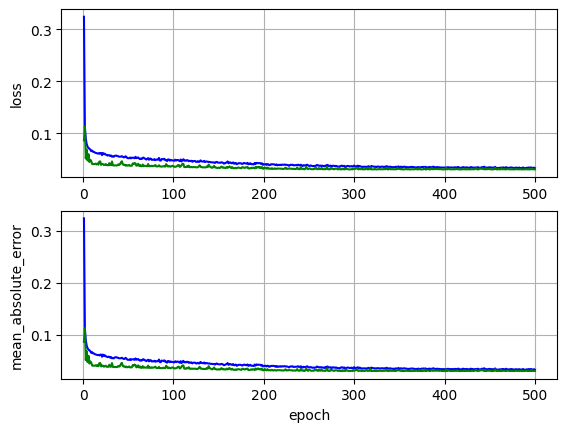

In [41]:
nb_epoch = 500
model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
model_history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, verbose=1, validation_split=0.2)

plt.figure()
plt.subplot(2,1,1);
plt.plot(range(1,nb_epoch+1), model_history.history['loss'], 'b',
         range(1,nb_epoch+1), model_history.history['val_loss'],'g')
plt.ylabel('loss'); plt.grid()
plt.subplot(2,1,2);
plt.plot(range(1,nb_epoch+1), model_history.history['mean_absolute_error'], 'b',
         range(1,nb_epoch+1), model_history.history['val_mean_absolute_error'],'g')
plt.ylabel('mean_absolute_error'); plt.grid(); plt.xlabel('epoch')
plt.show()

In [42]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test mae:', score[1])

Test loss: 0.03739789128303528
Test mae: 0.03739789128303528


In [43]:
model.save('HW3_1_3_T.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Make predictions on the test dataset using the trained LSTM model, then apply inverse scaling to the predictions and the actual test data to interpret the results in their original scale. (10 points)

Use to approaches:
1. Use the true values for the model's input in each time step.
2. Use the model's prediction in each time step for input in the next time step.

In [44]:
Y_test_P = model.predict(X_test, verbose=0).squeeze()

In [45]:
X_test *= np.max(np.absolute(x_test_meantemp))
Y_test *= np.max(np.absolute(x_test_meantemp))
Y_test_P *= np.max(np.absolute(x_test_meantemp))

Visualize the actual and predicted Delhi Mean Temperature over time, comparing the model's predictions against the actual data. (5 points)


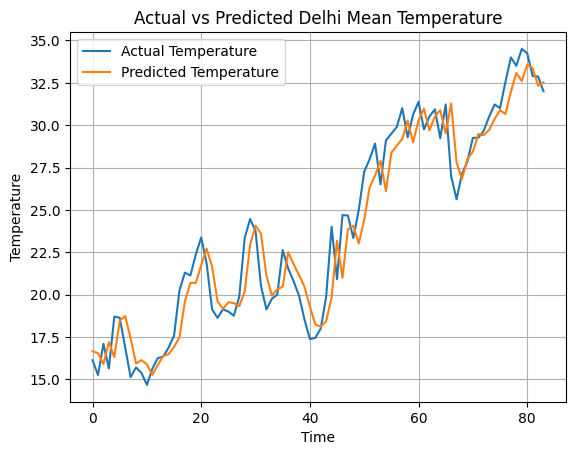

In [46]:
# Visualization of actual and predicted temperatures
plt.plot(range(len(Y_test)), Y_test, label='Actual Temperature')
plt.plot(range(len(Y_test_P)), Y_test_P, label='Predicted Temperature')
plt.title('Actual vs Predicted Delhi Mean Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

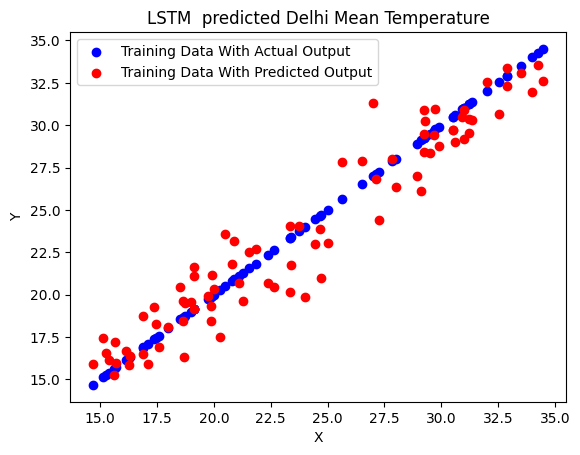

In [47]:
# plotting the actual data and model predictions
plt.scatter(x_test_meantemp[nb_time_steps:], Y_test, label='Training Data With Actual Output', color='blue')
plt.scatter(x_test_meantemp[nb_time_steps:], Y_test_P, label='Training Data With Predicted Output', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('LSTM  predicted Delhi Mean Temperature')
plt.show()

#P3: Predicting Humidity of Delhi (30 points)

In [63]:
# extracting and normalizing
x_train_humidity = trainDataset['humidity'].to_numpy()
x_test_humidity = testDataset['humidity'].to_numpy()
x_train_humidity_norm = x_train_humidity / np.max(np.absolute(x_train_humidity))
x_test_humidity_norm = x_test_humidity / np.max(np.absolute(x_test_humidity))
# creating dataset
X_train, Y_train = create_dataset(x_train_humidity_norm, look_back=nb_time_steps)
X_test, Y_test = create_dataset(x_test_humidity_norm, look_back=nb_time_steps)

In [68]:
model = Sequential()

model.add(LSTM(64, input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16961 (66.25 KB)
Trainable params: 16961 (66.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/500
9/9 [==============================] - 3s 61ms/step - loss: 0.5314 - mean_absolute_error: 0.5314 - val_loss: 0.2598 - val_mean_absolute_error: 0.2598
Epoch 2/500
9/9 [==============================] - 0s 11ms/step - loss: 0.1747 - mean_absolute_error: 0.1747 - val_loss: 0.1219 - val_mean_absolute_error: 0.1219
Epoch 3/500
9/9 [==============================] - 0s 10ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - val_loss: 0.1086 - val_mean_absolute_error: 0.1086
Epoch 4/500
9/9 [==============================] - 0s 10ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - val_loss: 0.0881 - val_mean_absolute_error: 0.0881
Epoch 5/500
9/9 [==============================] - 0s 10ms/step - loss: 0.1042 - mean_absolute_error: 0.1042 - val_loss: 0.0829 - val_mean_absolute_error: 0.0829
Epoch 6/500
9/9 [==============================] - 0s 10ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - val_loss: 0.0824 - val_mean_absolute_error: 0.0824
Epoch 7/500
9/9 [===========

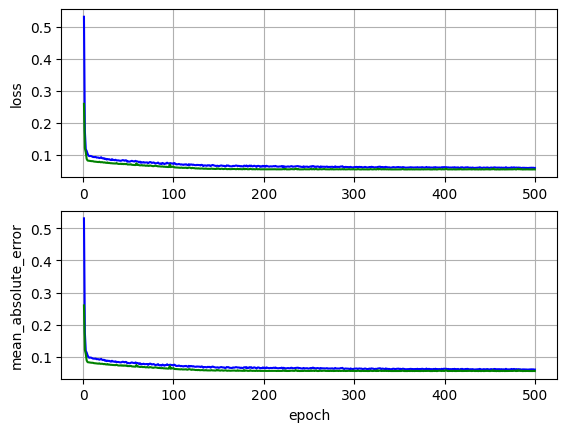

In [69]:
nb_epoch = 500
model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
model_history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, verbose=1, validation_split=0.2)

plt.figure()
plt.subplot(2,1,1);
plt.plot(range(1,nb_epoch+1), model_history.history['loss'], 'b',
         range(1,nb_epoch+1), model_history.history['val_loss'],'g')
plt.ylabel('loss'); plt.grid()
plt.subplot(2,1,2);
plt.plot(range(1,nb_epoch+1), model_history.history['mean_absolute_error'], 'b',
         range(1,nb_epoch+1), model_history.history['val_mean_absolute_error'],'g')
plt.ylabel('mean_absolute_error'); plt.grid(); plt.xlabel('epoch')
plt.show()

In [70]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test mse:', score[1])

Test loss: 0.05580991879105568
Test mse: 0.05580991879105568


In [71]:
model.save('HW3_1_3_h.h5')

In [72]:
Y_test_P = model.predict(X_test, verbose=0).squeeze()

In [73]:
X_test *= np.max(np.absolute(x_test_humidity))
Y_test *= np.max(np.absolute(x_test_humidity))
Y_test_P *= np.max(np.absolute(x_test_humidity))

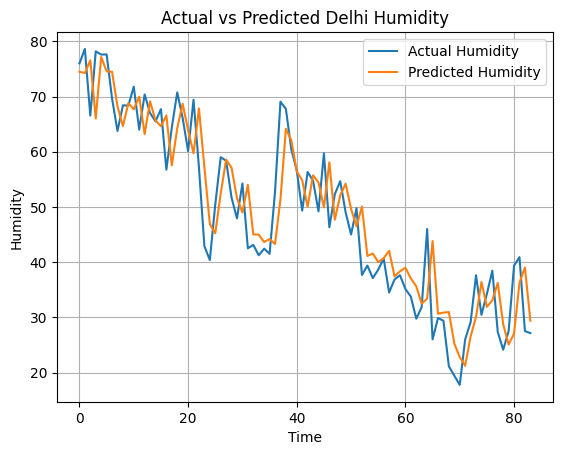

In [74]:
# Visualization of actual and predicted humidity
plt.plot(range(len(Y_test)), Y_test, label='Actual Humidity')
plt.plot(range(len(Y_test_P)), Y_test_P, label='Predicted Humidity')
plt.title('Actual vs Predicted Delhi Humidity')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.legend()
plt.grid()
plt.show()

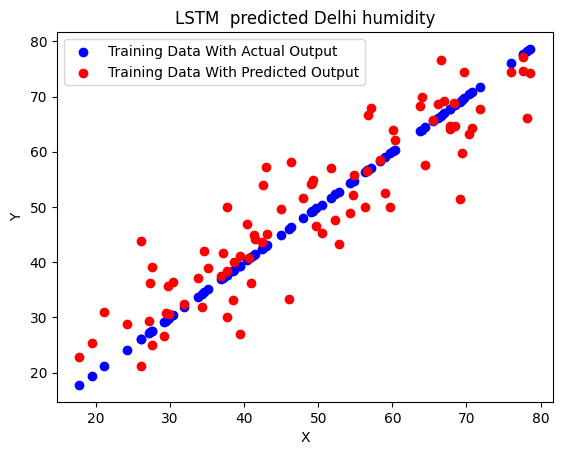

In [75]:
# plotting the actual data and model predictions
plt.scatter(x_test_humidity[nb_time_steps:], Y_test, label='Training Data With Actual Output', color='blue')
plt.scatter(x_test_humidity[nb_time_steps:], Y_test_P, label='Training Data With Predicted Output', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('LSTM  predicted Delhi humidity')
plt.show()

#P4: Predicting Delhi Wind Speed (30 points)

In [76]:
# extracting and normalizing
x_train_windspeed = trainDataset['wind_speed'].to_numpy()
x_test_windspeed = testDataset['wind_speed'].to_numpy()
x_train_windspeed_norm = x_train_windspeed / np.max(np.absolute(x_train_windspeed))
x_test_windspeed_norm = x_test_windspeed / np.max(np.absolute(x_test_windspeed))
# creating dataset
X_train, Y_train = create_dataset(x_train_windspeed_norm, look_back=nb_time_steps)
X_test, Y_test = create_dataset(x_test_windspeed_norm, look_back=nb_time_steps)

In [94]:
# creating the model
model = Sequential()

model.add(LSTM(64, input_shape=input_shape, return_sequences= True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 30, 64)            16896     
                                                                 
 dropout_16 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/400
9/9 [==============================] - 4s 99ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - val_loss: 0.0754 - val_mean_absolute_error: 0.0754
Epoch 2/400
9/9 [==============================] - 0s 11ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - val_loss: 0.0843 - val_mean_absolute_error: 0.0843
Epoch 3/400
9/9 [==============================] - 0s 12ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - val_loss: 0.0715 - val_mean_absolute_error: 0.0715
Epoch 4/400
9/9 [==============================] - 0s 12ms/step - loss: 0.0769 - mean_absolute_error: 0.0769 - val_loss: 0.0747 - val_mean_absolute_error: 0.0747
Epoch 5/400
9/9 [==============================] - 0s 12ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - val_loss: 0.0724 - val_mean_absolute_error: 0.0724
Epoch 6/400
9/9 [==============================] - 0s 11ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - val_loss: 0.0722 - val_mean_absolute_error: 0.0722
Epoch 7/400
9/9 [===========

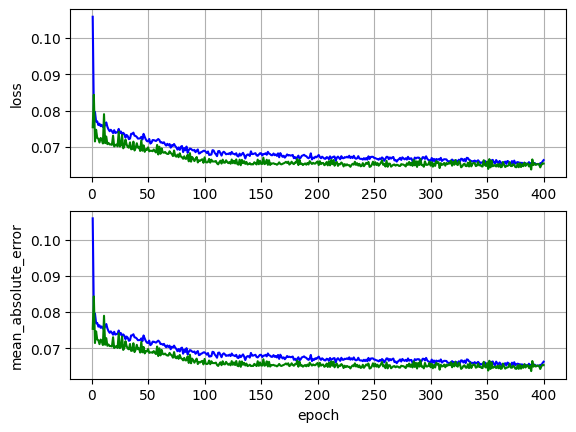

In [95]:
nb_epoch = 400
model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
model_history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, verbose=1, validation_split=0.2)

plt.figure()
plt.subplot(2,1,1);
plt.plot(range(1,nb_epoch+1), model_history.history['loss'], 'b',
         range(1,nb_epoch+1), model_history.history['val_loss'],'g')
plt.ylabel('loss'); plt.grid()
plt.subplot(2,1,2);
plt.plot(range(1,nb_epoch+1), model_history.history['mean_absolute_error'], 'b',
         range(1,nb_epoch+1), model_history.history['val_mean_absolute_error'],'g')
plt.ylabel('mean_absolute_error'); plt.grid(); plt.xlabel('epoch')
plt.show()

In [96]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test mae:', score[1])

Test loss: 0.28710779547691345
Test mae: 0.28710779547691345


In [97]:
model.save('HW3_1_4_w.h5')

In [98]:
Y_test_P = model.predict(X_test, verbose=0).squeeze()

In [99]:
X_test *= np.max(np.absolute(x_test_windspeed))
Y_test *= np.max(np.absolute(x_test_windspeed))
Y_test_P *= np.max(np.absolute(x_test_windspeed))

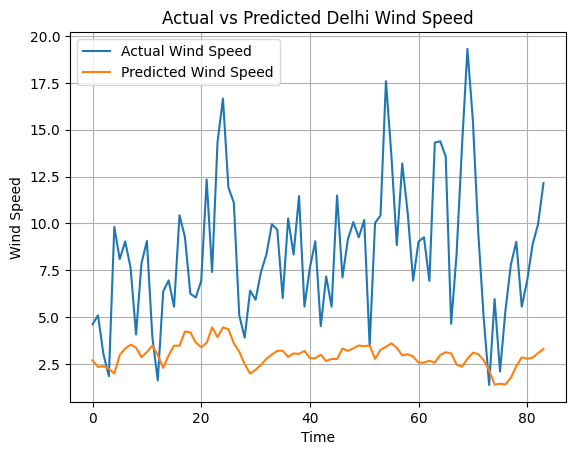

In [100]:
# Visualization of actual and predicted Wind Speed
plt.plot(range(len(Y_test)), Y_test, label='Actual Wind Speed')
plt.plot(range(len(Y_test_P)), Y_test_P, label='Predicted Wind Speed')
plt.title('Actual vs Predicted Delhi Wind Speed')
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.legend()
plt.grid()
plt.show()

#P5: Predicting Mean Pressure of Delhi (30 points)

In [105]:
x_train_meanpressure = trainDataset['meanpressure'].to_numpy()
x_test_meanpressure = testDataset['meanpressure'].to_numpy()
x_train_meanpressure_norm = x_train_meanpressure / np.max(np.absolute(x_train_meanpressure))
x_test_meanpressure_norm = x_test_meanpressure / np.max(np.absolute(x_test_meanpressure))
# creating dataset
X_train, Y_train = create_dataset(x_train_meanpressure_norm, look_back=nb_time_steps)
X_test, Y_test = create_dataset(x_test_meanpressure_norm, look_back=nb_time_steps)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 30, 8)             320       
                                                                 
 lstm_50 (LSTM)              (None, 4)                 208       
                                                                 
 dropout_26 (Dropout)        (None, 4)                 0         
                                                                 
 dense_28 (Dense)            (None, 1)                 5         
                                                                 
Total params: 533 (2.08 KB)
Trainable params: 533 (2.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
9/9 [==============================] - 4s 97ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - val_loss: 0.0290 - val_mean_absolute_error: 

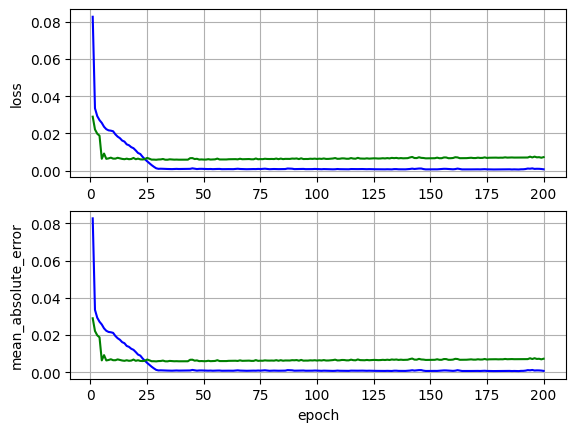

In [123]:
model = Sequential()

model.add(LSTM(8, input_shape=input_shape, return_sequences= True))
model.add(LSTM(4))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

model.summary()

nb_epoch = 200
model.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])
model_history = model.fit(X_train, Y_train, epochs=nb_epoch, batch_size=batch_size, verbose=1, validation_split=0.2)

plt.figure()
plt.subplot(2,1,1);
plt.plot(range(1,nb_epoch+1), model_history.history['loss'], 'b',
         range(1,nb_epoch+1), model_history.history['val_loss'],'g')
plt.ylabel('loss'); plt.grid()
plt.subplot(2,1,2);
plt.plot(range(1,nb_epoch+1), model_history.history['mean_absolute_error'], 'b',
         range(1,nb_epoch+1), model_history.history['val_mean_absolute_error'],'g')
plt.ylabel('mean_absolute_error'); plt.grid(); plt.xlabel('epoch')
plt.show()

In [124]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test mae:', score[1])

Test loss: 0.5778559446334839
Test mae: 0.5778559446334839


In [125]:
model.save('HW3_1_4_P.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [126]:
Y_test_P = model.predict(X_test, verbose=0).squeeze()

X_test *= np.max(np.absolute(x_test_meanpressure))
Y_test *= np.max(np.absolute(x_test_meanpressure))
Y_test_P *= np.max(np.absolute(x_test_meanpressure))

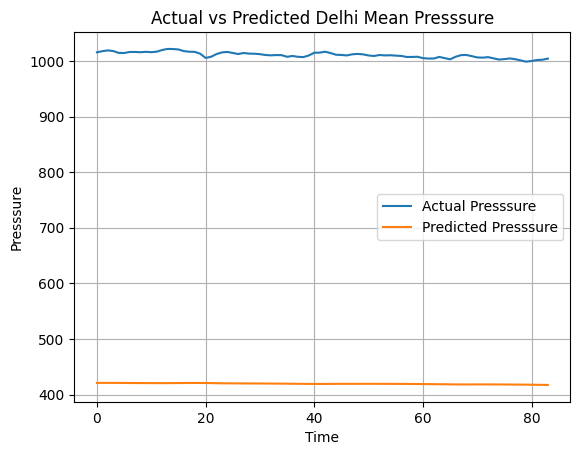

In [127]:
# Visualization of actual and predicted Presssure
plt.plot(range(len(Y_test)), Y_test, label='Actual Presssure')
plt.plot(range(len(Y_test_P)), Y_test_P, label='Predicted Presssure')
plt.title('Actual vs Predicted Delhi Mean Presssure')
plt.xlabel('Time')
plt.ylabel('Presssure')
plt.legend()
plt.grid()
plt.show()

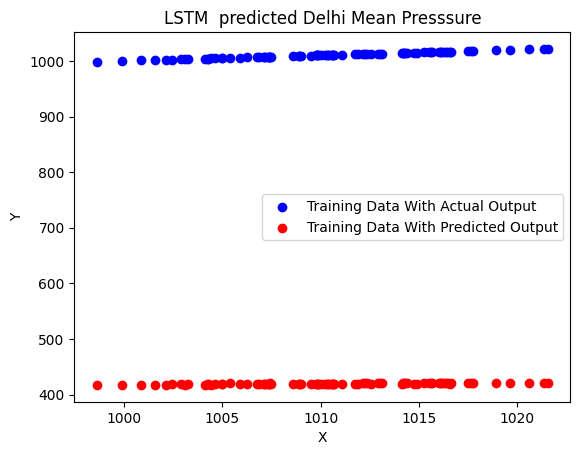

In [128]:
# plotting the actual data and model predictions
plt.scatter(x_test_meanpressure[nb_time_steps:], Y_test, label='Training Data With Actual Output', color='blue')
plt.scatter(x_test_meanpressure[nb_time_steps:], Y_test_P, label='Training Data With Predicted Output', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('LSTM  predicted Delhi Mean Presssure')
plt.show()

# sites

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

